In [2]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from my_function import *

In [3]:
data = pd.read_csv('C:\Th-th-ch-BAI-Labs\Bai_4\data\Mall_Customers.csv')

<>:1: SyntaxWarning: invalid escape sequence '\T'
<>:1: SyntaxWarning: invalid escape sequence '\T'
C:\Users\Admin\AppData\Local\Temp\ipykernel_20668\4250989718.py:1: SyntaxWarning: invalid escape sequence '\T'
  data = pd.read_csv('C:\Th-th-ch-BAI-Labs\Bai_4\data\Mall_Customers.csv')


In [4]:
df = data.copy()

In [5]:
df.pop('CustomerID')
df.pop('Genre')

0        Male
1        Male
2      Female
3      Female
4      Female
        ...  
195    Female
196    Female
197      Male
198      Male
199      Male
Name: Genre, Length: 200, dtype: object

In [6]:
df

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


In [7]:
scaler = StandardScaler()
df = scaler.fit_transform(df)

In [8]:
df = pd.DataFrame(df, columns = ['Age','Annual Income (k$)','Spending Score (1-100)'])

In [9]:
outliner(df)

Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


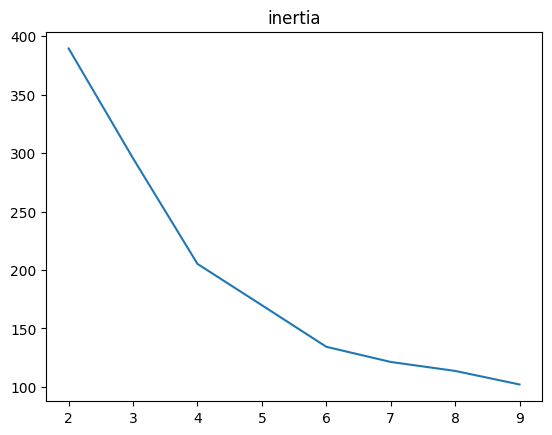

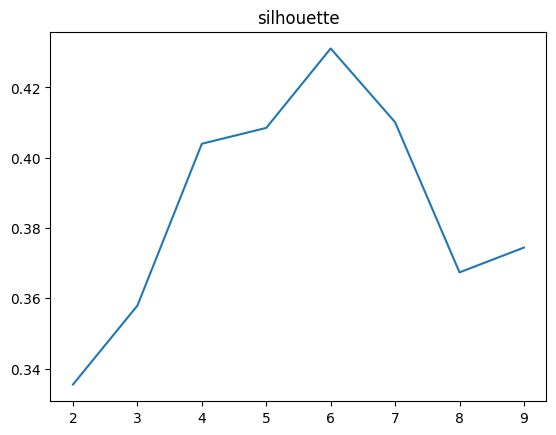

In [10]:
K = range(2, 10)
plt.plot(K, kmean_inertia(df, K))
plt.title('inertia')
plt.show()

plt.plot(K, kmean_silhouette(df, K))
plt.title('silhouette')
plt.show()

In [11]:
kmean = KMeans(n_clusters = 6, random_state = 42)
kmean.fit(df)

,n_clusters,6
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,42
,copy_x,True
,algorithm,'lloyd'


In [12]:
data['Label'] = kmean.labels_

In [13]:
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Label
0,1,Male,19,15,39,2
1,2,Male,21,15,81,2
2,3,Female,20,16,6,5
3,4,Female,23,16,77,2
4,5,Female,31,17,40,5


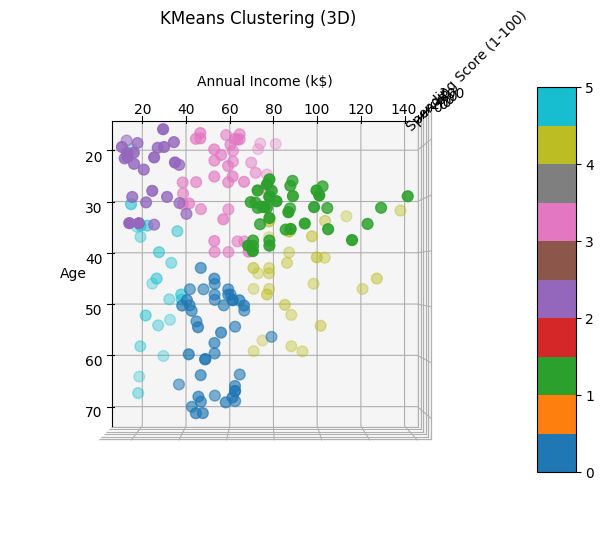

In [14]:

# --- 5. Vẽ biểu đồ 3D ---
fig = plt.figure(figsize=(8, 10))
ax = fig.add_subplot(111, projection='3d')

# Vẽ cụm
scatter = ax.scatter(
    data['Age'],
    data['Annual Income (k$)'],
    data['Spending Score (1-100)'],
    c=data['Label'],
    cmap='tab10',
    s=60
)

# Đặt tên trục
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
ax.set_title('KMeans Clustering (3D)')

# Hiển thị màu cụm
plt.colorbar(scatter, ax=ax, shrink=0.5, aspect=10)

# (Tuỳ chọn) chỉnh góc nhìn
ax.view_init(elev=90, azim=5)

plt.show()